In [2]:
### import necessary packages
import uproot
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import time
from tqdm import tqdm
from itertools import permutations, product, combinations, chain
import glob

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams.update({'font.size': 18})
plt.rcParams["font.weight"] = 'light'
plt.rcParams["axes.labelweight"] = 'light'
plt.rcParams["font.family"] = ['Times New Roman']

#from joblib import Parallel, delayed
#import multiprocessing

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,8)

import histlite as hl

# Photon scattering in liquid xenon

In [3]:
df = pd.read_csv('xe_photon_scattering_data.txt',delimiter='\t')
df.head()

,PhotonEnergy,CoherentScatter,IncoherScatter,Photoelectric,NuclearPairPr,ElectronPairPr,Tot. w/ Coh,Tot. wo/ Coh
0,0.001000,8.458,0.004417,9403.0,0.0,0.0,9412.0,9403.0
1,0.001072,8.393,0.004969,8133.0,0.0,0.0,8141.0,8133.0
2,0.001149,8.325,0.005582,7032.0,0.0,0.0,7040.0,7032.0
3,0.001149,8.325,0.005582,7334.0,0.0,0.0,7343.0,7334.0
4,0.001500,8.000,0.008522,4077.0,0.0,0.0,4085.0,4077.0


(0.0001, 10000.0)

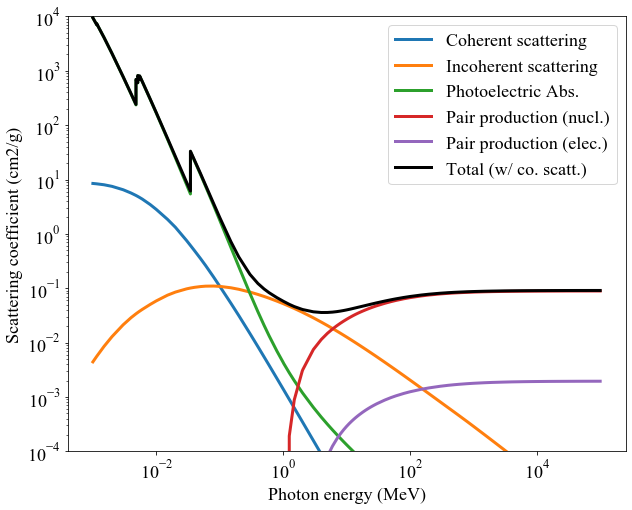

In [4]:
plt.plot(df['PhotonEnergy   '],df['CoherentScatter'],label='Coherent scattering',linewidth=3)
plt.plot(df['PhotonEnergy   '],df['IncoherScatter'],label='Incoherent scattering',linewidth=3)
plt.plot(df['PhotonEnergy   '],df['Photoelectric'],label='Photoelectric Abs.',linewidth=3)
plt.plot(df['PhotonEnergy   '],df['NuclearPairPr '],label='Pair production (nucl.)',linewidth=3)
plt.plot(df['PhotonEnergy   '],df['ElectronPairPr'],label='Pair production (elec.)',linewidth=3)
plt.plot(df['PhotonEnergy   '],df['Tot. w/ Coh '],'-k',label='Total (w/ co. scatt.)',linewidth=3)
#plt.plot(df['PhotonEnergy   '],df['Tot. wo/ Coh'],label='Total (w/o co. scatt.)')

plt.xlabel('Photon energy (MeV)')
plt.ylabel('Scattering coefficient (cm2/g)')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.ylim(1.e-4,1.e4)


(50.0, 500.0)

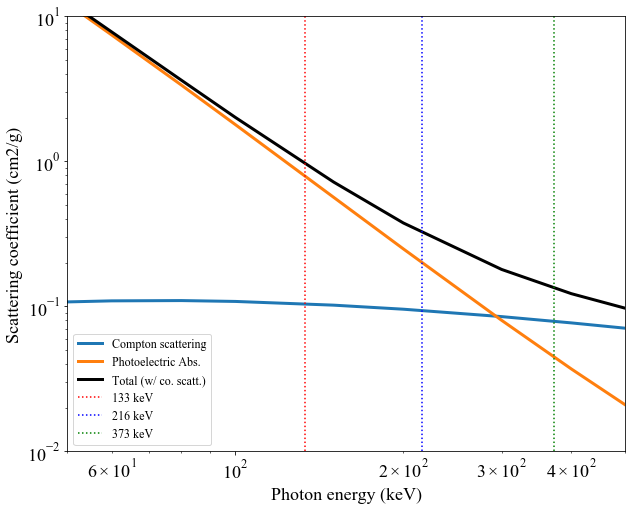

In [5]:
#plt.plot(df['PhotonEnergy   ']*1000.,df['CoherentScatter'],label='Coherent scattering',linewidth=3)
plt.plot(df['PhotonEnergy   ']*1000.,df['IncoherScatter'],label='Compton scattering',linewidth=3)
plt.plot(df['PhotonEnergy   ']*1000.,df['Photoelectric'],label='Photoelectric Abs.',linewidth=3)
#plt.plot(df['PhotonEnergy   ']*1000.,df['NuclearPairPr '],label='Pair production (nucl.)',linewidth=3)
#plt.plot(df['PhotonEnergy   ']*1000.,df['ElectronPairPr'],label='Pair production (elec.)',linewidth=3)
plt.plot(df['PhotonEnergy   ']*1000.,df['Tot. w/ Coh '],'-k',label='Total (w/ co. scatt.)',linewidth=3)
#plt.plot(df['PhotonEnergy   '],df['Tot. wo/ Coh'],label='Total (w/o co. scatt.)')

plt.plot(np.ones(10)*133.,np.logspace(-2.,1.,10),':r',label='133 keV')
plt.plot(np.ones(10)*216.,np.logspace(-2.,1.,10),':b',label='216 keV')
plt.plot(np.ones(10)*373.,np.logspace(-2.,1.,10),':g',label='373 keV')

plt.xlabel('Photon energy (keV)')
plt.ylabel('Scattering coefficient (cm2/g)')
plt.legend(fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1.e-2,1.e1)
plt.xlim(50.,500.)






(100.0, 500.0)

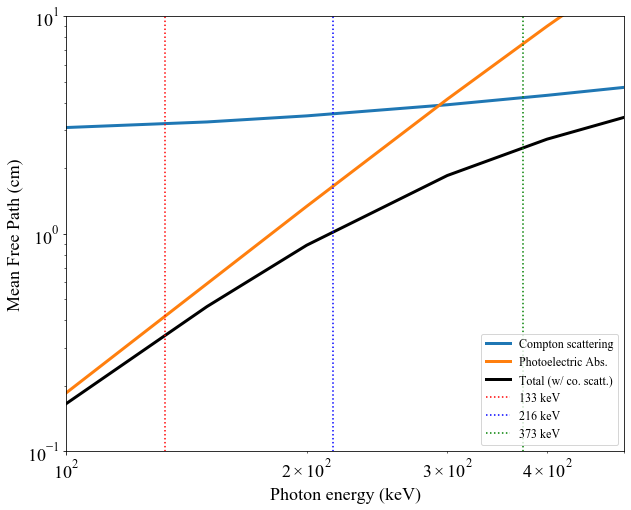

In [6]:
plt.plot(df['PhotonEnergy   ']*1000.,1/(df['IncoherScatter']*3.),label='Compton scattering',linewidth=3)
plt.plot(df['PhotonEnergy   ']*1000.,1/(df['Photoelectric']*3.),label='Photoelectric Abs.',linewidth=3)
plt.plot(df['PhotonEnergy   ']*1000.,1/(df['Tot. w/ Coh ']*3.),'-k',label='Total (w/ co. scatt.)',linewidth=3)

plt.plot(np.ones(10)*133.,np.logspace(-2.,1.,10),':r',label='133 keV')
plt.plot(np.ones(10)*216.,np.logspace(-2.,1.,10),':b',label='216 keV')
plt.plot(np.ones(10)*373.,np.logspace(-2.,1.,10),':g',label='373 keV')

plt.xlabel('Photon energy (keV)')
plt.ylabel('Mean Free Path (cm)')
plt.legend(fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1.e-1,1.e1)
plt.xlim(100.,500.)

# Energy resolution

In [7]:
xe100_resolution = np.genfromtxt('xenon100_s2_only_resolution.txt',delimiter=',')
xe100_resolution_errors = np.genfromtxt('xenon100_s2_only_resolution_upper_errors.txt',delimiter=',')
print(xe100_resolution)



[[3.76884422e+01 1.50565428e-01]
 [7.83919598e+01 1.38933764e-01]
 [1.62814070e+02 1.17932149e-01]
 [2.32160804e+02 9.95153473e-02]
 [6.61809045e+02 6.39741519e-02]
 [1.16532663e+03 5.39579968e-02]
 [1.33417085e+03 5.39579968e-02]]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


Text(0, 0.5, 'resolution')

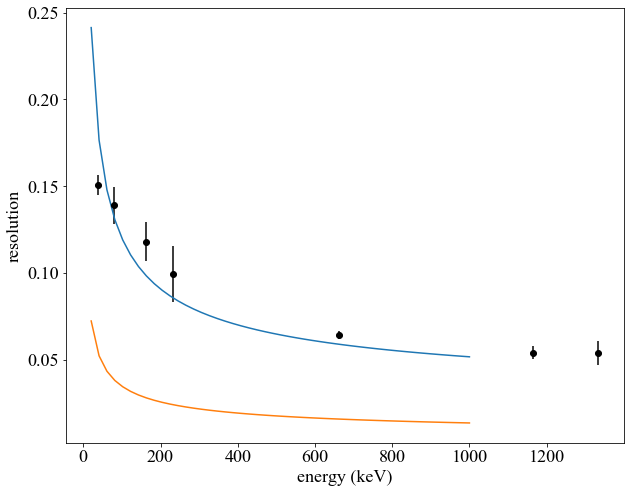

In [8]:
def energy_resolution(energy,a=30.98,b=0.37*12):
    res_rel = np.divide(a,np.sqrt(energy))+b
    res_abs = res_rel/100
    return res_abs #returns absolute energy

energy = np.linspace(0.,1000.)

plt.plot(energy,energy_resolution(energy,a=100.,b=2.),label = 'charge only')
plt.plot(energy,energy_resolution(energy,a=30.98,b=0.37),label='combined energy')

plt.errorbar(xe100_resolution[:,0],xe100_resolution[:,1],yerr=(xe100_resolution_errors[:,1]-xe100_resolution[:,1]),fmt='ok')

plt.xlabel('energy (keV)')
plt.ylabel('resolution')



In [9]:
xpts = xe100_resolution[:,0]
ypts = xe100_resolution[:,1]
yerr = (xe100_resolution_errors[:,1]-xe100_resolution[:,1])

In [10]:
import scipy.optimize as opt

def power_law( x, A, B):
    return A*x**B

p,pcov = opt.curve_fit(energy_resolution,xdata=xpts,ydata=ypts,sigma=yerr,p0=(100.,02.))
p2,pcov2 = opt.curve_fit(power_law,xdata=xpts[1:],ydata=ypts[1:],sigma=yerr[1:])


print('Best fit a: {:3.3}'.format(p[0]))
print('Best fit b: {:3.3}'.format(p[1]))

print('Best fit A (power law): {:3.3}'.format(p2[0]))
print('Best fit B (power law): {:3.3}'.format(p2[1]))

a_best = p[0]
b_best = p[1]

A_pow = p2[0]
B_pow = p2[1]


Best fit a: 75.0
Best fit b: 3.48
Best fit A (power law): 0.699
Best fit B (power law): -0.366


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.


Text(0, 0.5, 'resolution')

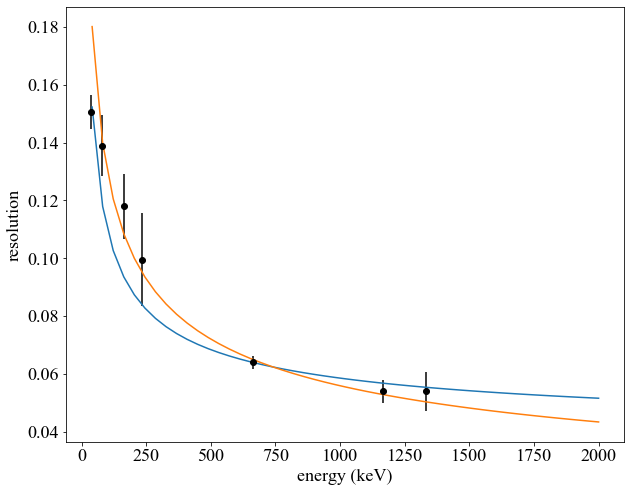

In [11]:
energy = np.linspace(0.,2000.)



plt.errorbar(xe100_resolution[:,0],xe100_resolution[:,1],yerr=(xe100_resolution_errors[:,1]-xe100_resolution[:,1]),fmt='ok')
plt.plot(energy,energy_resolution(energy,a=p[0],b=p[1]))
plt.plot(energy,power_law(energy,A=A_pow,B=B_pow))

#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('energy (keV)')
plt.ylabel('resolution')




In [12]:
print('Resolution at 133 keV: {:3.3}'.format(energy_resolution(133.,a_best,b_best)))
print('Resolution at 216 keV: {:3.3}'.format(energy_resolution(216.,a_best,b_best)))
print('Resolution at 373 keV: {:3.3}'.format(energy_resolution(373.,a_best,b_best)))

Resolution at 133 keV: 0.0999
Resolution at 216 keV: 0.0859
Resolution at 373 keV: 0.0737


In [13]:
print('Resolution at 133 keV: {:3.3}'.format(power_law(133.,A_pow,B_pow)))
print('Resolution at 216 keV: {:3.3}'.format(power_law(216.,A_pow,B_pow)))
print('Resolution at 373 keV: {:3.3}'.format(power_law(373.,A_pow,B_pow)))

Resolution at 133 keV: 0.117
Resolution at 216 keV: 0.0979
Resolution at 373 keV: 0.0802


In [14]:
print(xe100_resolution[:,0])

[  37.68844221   78.3919598   162.81407035  232.16080402  661.80904523
 1165.32663317 1334.17085427]


# Start of analysis stuff

In [15]:
### transforms a root file in a single index file
### had issues reading out the multiindex file although I think this is the way to go for an optimized script
### the function also sorts in zp for the further analysis
def transform_root_file_and_sort_by_z(filename):
    events=uproot.open(filename)["events"]
    events2=events["events"]# why do I have to do that
    df =  events2.pandas.df(["ed", "zp","xp","yp","trackid","parentid","etot"]) # make a pandas data frame with the parameters of interest
    df2 = df.sort_values('zp', ascending=False).sort_index(level='entry', sort_remaining=False) # sort by z
    df3 = df2.reset_index(level="entry") # remove multiindex1
    final_df = df3.reset_index(level="subentry") # remove multiindex2
    return final_df

In [16]:
filename = '2019-12-26_17-39-11_Be7_neutrino_ccapture_to_133keV_level.root'

events = uproot.open(filename)['events/events']

In [17]:
df = events.pandas.df(['ed','zp','xp','yp','rp_fromPri','trackid','parentid','time','eventid'])

In [18]:
df.head(n=100)

ed            zp        xp        yp  rp_fromPri  \
entry subentry                                                            
0     0         99.638680 -3.815156e-02  0.058709  0.019149    0.072588   
      1         77.498756 -2.071670e-02  0.099880  0.019525    0.103858   
      2         78.478104 -7.922981e-03  0.118929  0.007298    0.119415   
      3         94.406799 -6.662074e-03  0.112286  0.015858    0.113596   
      4         14.462670 -6.431974e-03  0.111926  0.015787    0.113216   
...                   ...           ...       ...       ...         ...   
2     13         0.000000  3.591150e-08  0.000003 -0.000002    0.000004   
      14         3.525554  1.279935e-05  0.000029 -0.000042    0.000053   
      15         0.000000  1.279935e-05  0.000029 -0.000042    0.000053   
      16         0.578881  3.819339e-06  0.000005 -0.000002    0.000006   
      17         0.000000  3.819339e-06  0.000005 -0.000002    0.000006   

                trackid  parentid          time  eventid  
entry subentry                                            
0     0               2         0  2.982000e-13        0  
      1               2         0  4.964142e-13        0  
      2               2         0  6.236596e-13        0  
      3               2         0  6.879357e-13        0  
      4               2         0  6.941442e-13        0  
...                 ...       ...           ...      ...  
2     13              7         1  1.590364e-12        2  
      14              6         1  1.591496e-12        2  
      15              6         1  1.591496e-12        2  
      16              5         1  1.590416e-12        2  
      17              5         1  1.590416e-12        2  

[100 rows x 9 columns]

In [242]:
dfsortedbyrpri = df.sort_values('rp_fromPri', ascending=True).sort_index(level='entry', sort_remaining=False) # sort by z

dfsortedbyz = df.sort_values('zp', ascending=True).sort_index(level='entry', sort_remaining=False) # sort by z
    
 
    
    
    

In [239]:
#dfsorted.head(n=200)



In [257]:
df3 = dfsortedbyrpri.reset_index(level="entry") # remove multiindex1
final_df_rpri = df3.reset_index(level="subentry") # remove multiindex2
    
df4 = dfsortedbyz.reset_index(level="entry") # remove multiindex1
final_df_z = df4.reset_index(level="subentry") # remove multiindex2
    

In [244]:
final_df_rpri.head()

,subentry,entry,ed,zp,xp,yp,rp_fromPri,trackid,parentid,time,eventid
0,6,0,0.000001,-3.215068e-08,4.947488e-08,1.613712e-08,6.117055e-08,1,0,1.589980e-12,0
1,7,0,0.000000,-3.215068e-08,4.947488e-08,1.613712e-08,6.117055e-08,1,0,1.589980e-12,0
2,16,0,0.000219,-8.321161e-07,-3.644425e-07,9.231689e-08,9.131035e-07,3,1,3.179776e-12,0
3,17,0,0.000000,-8.321161e-07,-3.644425e-07,9.231689e-08,9.131035e-07,3,1,3.179776e-12,0
4,13,0,0.000000,6.127777e-06,-1.722503e-07,2.528734e-06,6.631276e-06,5,1,1.590427e-12,0


In [258]:
final_df_z.head()

,subentry,entry,ed,zp,xp,yp,rp_fromPri,trackid,parentid,time,eventid
0,24,0,4.774700,-0.086325,0.007212,0.040803,0.095755,11,3,3.499177e-12,0
1,26,0,0.000000,-0.086322,0.006254,0.041298,0.095897,13,11,3.510910e-12,0
2,25,0,25.847143,-0.086322,0.006254,0.041298,0.095897,13,11,3.510910e-12,0
3,0,0,99.638680,-0.038152,0.058709,0.019149,0.072588,2,0,2.982000e-13,0
4,1,0,77.498756,-0.020717,0.099880,0.019525,0.103858,2,0,4.964142e-13,0


In [28]:

def GetEmptyEventDict():
    return { 'ClusterMeanX': np.zeros(15),
            'ClusterMeanY': np.zeros(15),
           'ClusterMeanZ': np.zeros(15),
           'ClusterMeanDistFromPrimary': np.zeros(15),
           'ClusterWidthSigma': np.zeros(15),
           'ClusterEnergykeV': np.zeros(15),
           'NumClusters': 1,
           'TotalEnergy': 0.}


In [246]:
print(len(final_df))

3621081


In [19]:
def ClusterInZ( input_df, z_resolution = 3., num_lines = -1):

    start_time = time.time()
    thisEvt = 0
    evt_list = []
    evt_dict = GetEmptyEventDict()
    
    zres = z_resolution # mm

    if True:
        thisCluster = 0
        thisClusterMeanX = 0.
        thisClusterMeanY = 0.
        thisClusterMeanZ = 0.
        thisClusterMeanDistFromPrimary = 0.
        thisClusterWidthSigma = 1000.
        thisClusterEnergyDep = 0.
        thisEnergyDepInCluster = 0
        numClusters = 1


    for index,row in input_df.iterrows():
        if index % 50000 == 0:
            print('Index: {}, event: {}, thisEvt: {}'.format(index,int(row['eventid']),thisEvt))
        if index > num_lines and num_lines > 0: break
        if row['time'] > 1.: continue
        
        if int(row['eventid']) > thisEvt:
            evt_list.append(evt_dict)
            evt_dict = GetEmptyEventDict()
            thisEvt += 1
            thisCluster = 0
            thisClusterMeanX = row['xp']
            thisClusterMeanY = row['yp']
            thisClusterMeanZ = row['zp']
            thisClusterMeanDistFromPrimary = np.sqrt( row['xp']**2 + row['yp']**2 + row['zp']**2)
            thisClusterWidthSigma = 1000.
            thisClusterEnergyDep = row['ed']
            thisEnergyDepInCluster = 0
            numClusters = 1
            totalEnergy = row['ed']
        elif (row['zp'] - thisClusterMeanZ)**2 > zres**2:
            # Save cluster information to evt_dict
            evt_dict['ClusterMeanX'][thisCluster] = thisClusterMeanX
            evt_dict['ClusterMeanY'][thisCluster] = thisClusterMeanY
            evt_dict['ClusterMeanZ'][thisCluster] = thisClusterMeanZ
            evt_dict['ClusterMeanDistFromPrimary'][thisCluster] = thisClusterMeanDistFromPrimary
            evt_dict['ClusterWidthSigma'][thisCluster] = thisClusterWidthSigma
            evt_dict['ClusterEnergykeV'][thisCluster] = thisClusterEnergyDep
            evt_dict['NumClusters'] += 1
            evt_dict['TotalEnergy'] += row['ed']
        # Reset cluster variables, start new cluster
            numClusters += 1
            thisCluster +=1
            thisClusterMeanX = row['xp']
            thisClusterMeanY = row['yp']
            thisClusterMeanZ = row['zp']
            thisClusterMeanDistFromPrimary = np.sqrt( row['xp']**2 + row['yp']**2 + row['zp']**2)
            thisClusterWidthSigma = 1000.
            thisClusterEnergyDep = row['ed']
            thisEnergyDepInCluster = 0
        else:
            thisEnergyDepInCluster += 1
            oldClusterMeanX = thisClusterMeanX
            oldClusterMeanY = thisClusterMeanY
            oldClusterMeanZ = thisClusterMeanZ

            thisClusterMeanX = thisClusterMeanX * (thisEnergyDepInCluster-1)/(thisEnergyDepInCluster) + \
                row['xp']/thisEnergyDepInCluster
            thisClusterMeanY = thisClusterMeanY * (thisEnergyDepInCluster-1)/(thisEnergyDepInCluster) + \
                row['yp']/thisEnergyDepInCluster
            thisClusterMeanZ = thisClusterMeanZ * (thisEnergyDepInCluster-1)/(thisEnergyDepInCluster) + \
                row['zp']/thisEnergyDepInCluster
            thisClusterMeanDistFromPrimary = thisClusterMeanDistFromPrimary * (thisEnergyDepInCluster-1)/(thisEnergyDepInCluster) + \
                row['rp_fromPri']/thisEnergyDepInCluster
            thisClusterEnergyDep += row['ed']
            if thisEnergyDepInCluster > 1:
                N = thisEnergyDepInCluster
                thisClusterWidthSigma = np.sqrt( \
                                        1/(N-1) * ( \
                                            (N-2)*thisClusterWidthSigma**2 + \
                                            (\
                                                (row['xp'] - thisClusterMeanX)**2 + \
                                                (row['yp'] - thisClusterMeanY)**2 + \
                                                (row['zp'] - thisClusterMeanZ)**2 ) +\
                                            (N-1)*(\
                                                (oldClusterMeanX-thisClusterMeanX)**2 + \
                                                (oldClusterMeanY-thisClusterMeanY)**2 + \
                                                (oldClusterMeanZ-thisClusterMeanZ)**2) ) )
            else:
                thisClusterWidthSigma = 1000.
            evt_dict['ClusterMeanX'][thisCluster] = thisClusterMeanX
            evt_dict['ClusterMeanY'][thisCluster] = thisClusterMeanY
            evt_dict['ClusterMeanZ'][thisCluster] = thisClusterMeanZ
            evt_dict['ClusterMeanDistFromPrimary'][thisCluster] = thisClusterMeanDistFromPrimary
            evt_dict['ClusterWidthSigma'][thisCluster] = thisClusterWidthSigma
            evt_dict['ClusterEnergykeV'][thisCluster] = thisClusterEnergyDep
            evt_dict['TotalEnergy'] += row['ed']

    print('Returning {} events. Elapsed time: {:3.3}s\n'.format(len(evt_list),time.time()-start_time))
    return pd.DataFrame(evt_list)
        
        
    
    
    

In [260]:
resolution_values = [1.,2.,3.,4.,5.,7.,10.,15.,20.]
list_of_dfs_rpri = []
list_of_dfs_z = []

for zres in resolution_values:
    print('Z-resolution: {} mm'.format(zres))
    list_of_dfs_rpri.append(ClusterInZ(final_df_rpri,zres,30000))
    list_of_dfs_z.append(ClusterInZ(final_df_z,zres,30000))

Z-resolution: 1.0 mm
Index: 0, event: 0, thisEvt: 0
Returning 832 events. Elapsed time: 3.48s

Index: 0, event: 0, thisEvt: 0
Returning 832 events. Elapsed time: 3.64s

Z-resolution: 2.0 mm
Index: 0, event: 0, thisEvt: 0
Returning 832 events. Elapsed time: 3.34s

Index: 0, event: 0, thisEvt: 0
Returning 832 events. Elapsed time: 3.3s

Z-resolution: 3.0 mm
Index: 0, event: 0, thisEvt: 0
Returning 832 events. Elapsed time: 3.34s

Index: 0, event: 0, thisEvt: 0
Returning 832 events. Elapsed time: 3.46s

Z-resolution: 4.0 mm
Index: 0, event: 0, thisEvt: 0
Returning 832 events. Elapsed time: 3.45s

Index: 0, event: 0, thisEvt: 0
Returning 832 events. Elapsed time: 3.46s

Z-resolution: 5.0 mm
Index: 0, event: 0, thisEvt: 0
Returning 832 events. Elapsed time: 3.29s

Index: 0, event: 0, thisEvt: 0
Returning 832 events. Elapsed time: 3.3s

Z-resolution: 7.0 mm
Index: 0, event: 0, thisEvt: 0
Returning 832 events. Elapsed time: 3.41s

Index: 0, event: 0, thisEvt: 0
Returning 832 events. Elapsed t

In [261]:
df_evt_list.head()
print(len(df_evt_list))

2754


Text(0.5, 0, 'Number of clusters')

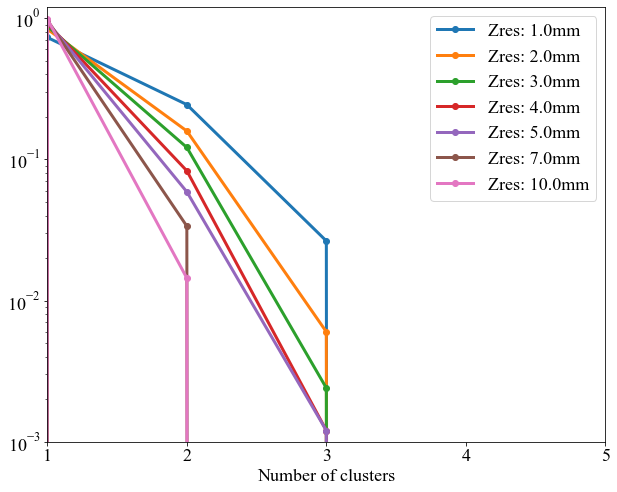

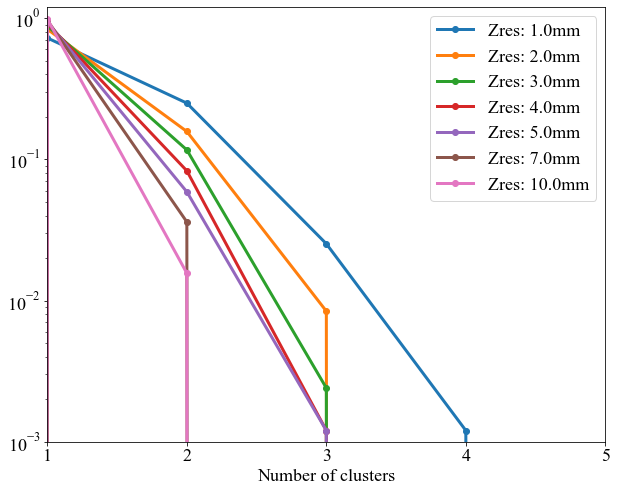

In [266]:
plt.figure(1)
for i in range(0,len(resolution_values)):
    
    h_clusters = hl.hist((list_of_dfs_z[i])['NumClusters'],bins=np.linspace(-0.5,14.5,16))
    #hl.plot1d(h_clusters/len(list_of_dfs[i]),label='Zres: {}mm'.format(resolution_values[i]),linewidth=3)
    
    plt.plot( np.linspace(0.,14.,15), (h_clusters/len(list_of_dfs_z[i])).values,'-o',label='Zres: {}mm'.format(resolution_values[i]),linewidth=3)

    
plt.legend()
plt.xlim(1.,5.)
plt.ylim(0.001,1.2)
plt.xticks([1.,2.,3.,4.,5.],['1','2','3','4','5'])
plt.yscale('log')


plt.xlabel('Number of clusters')

plt.figure(2)

for i in range(0,len(resolution_values)):
    
    h_clusters = hl.hist((list_of_dfs_rpri[i])['NumClusters'],bins=np.linspace(-0.5,14.5,16))
    #hl.plot1d(h_clusters/len(list_of_dfs[i]),label='Zres: {}mm'.format(resolution_values[i]),linewidth=3)
    
    plt.plot( np.linspace(0.,14.,15), (h_clusters/len(list_of_dfs_rpri[i])).values,'-o',label='Zres: {}mm'.format(resolution_values[i]),linewidth=3)

    
plt.legend()
plt.xlim(1.,5.)
plt.ylim(0.001,1.2)
plt.xticks([1.,2.,3.,4.,5.],['1','2','3','4','5'])
plt.yscale('log')


plt.xlabel('Number of clusters')


Passing cuts: 203 (fraction: 0.07371)
Passing cuts: 132 (fraction: 0.04793)
Passing cuts: 101 (fraction: 0.03667)
Passing cuts: 69 (fraction: 0.02505)
Passing cuts: 49 (fraction: 0.01779)
Passing cuts: 28 (fraction: 0.01017)
Passing cuts: 12 (fraction: 0.004357)


Text(0, 0.5, 'Efficiency of tagging the 133 keV gamma')

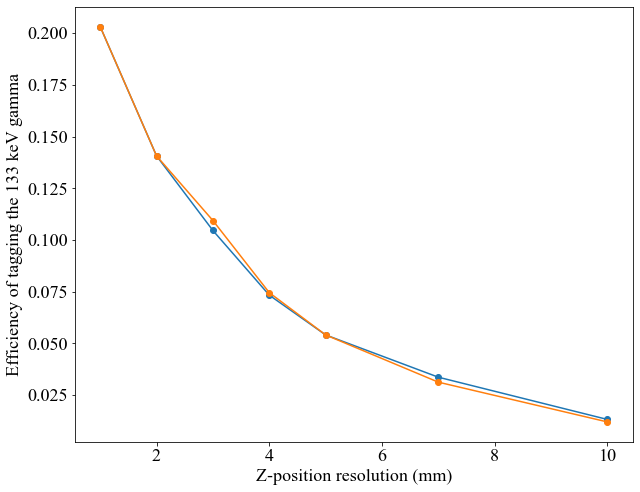

In [270]:
eff_values_z = np.zeros(len(resolution_values))
eff_values_rpri = np.zeros(len(resolution_values))


for i in range(0,len(resolution_values)):

    fulldfwidthstack = np.stack(list_of_dfs_rpri[i]['ClusterWidthSigma'].values)
    twocluster_mask = ((list_of_dfs_rpri[i])['NumClusters']==2)#&(fulldfwidthstack[:,0] < 1.)
    fulldfenergystack = np.stack((list_of_dfs_rpri[i])['ClusterEnergykeV'].loc[:].values)
    twocluster_and_gamma_energy_mask = twocluster_mask&(fulldfenergystack[:,1]>131.)&(fulldfenergystack[:,1]<135.)
    eff_values_rpri[i] = np.sum(twocluster_and_gamma_energy_mask)/len((list_of_dfs_rpri[i]))

    fulldfwidthstack = np.stack(list_of_dfs_z[i]['ClusterWidthSigma'].values)
    twocluster_mask = ((list_of_dfs_z[i])['NumClusters']==2)#&(fulldfwidthstack[:,0] < 1.)
    fulldfenergystack = np.stack((list_of_dfs_z[i])['ClusterEnergykeV'].loc[:].values)
    twocluster_and_gamma_energy_mask = twocluster_mask&( ( (fulldfenergystack[:,1]>131.)&(fulldfenergystack[:,1]<135.) )|((fulldfenergystack[:,0]>131.)&(fulldfenergystack[:,0]<135.)) )
    eff_values_z[i] = np.sum(twocluster_and_gamma_energy_mask)/len((list_of_dfs_rpri[i]))



    print('Passing cuts: {} (fraction: {:4.4})'.format(np.sum(twocluster_mask),np.sum(twocluster_mask)/len(df_evt_list)))


plt.plot(resolution_values,eff_values_rpri,'-o')
plt.plot(resolution_values,eff_values_z,'-o')
#plt.yscale('log')
plt.xlabel('Z-position resolution (mm)')
plt.ylabel('Efficiency of tagging the 133 keV gamma')



11.765922226629563


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


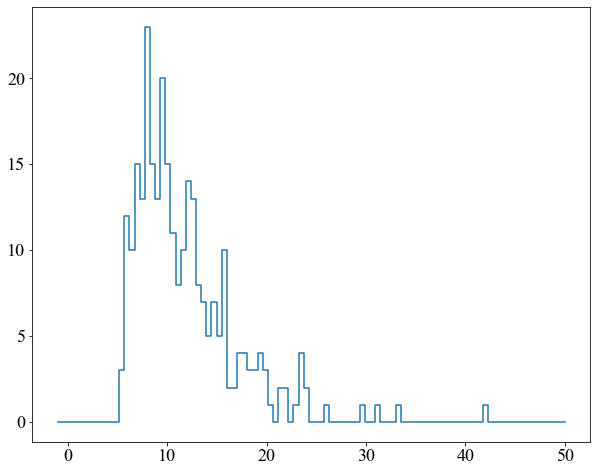

In [233]:

zres_idx = 4

twocluster_mask = ((list_of_dfs[zres_idx])['NumClusters']==2)
subdf = np.stack(list_of_dfs[zres_idx]['ClusterMeanDistFromPrimary'].loc[twocluster_mask].values)

h_dist_2 = hl.hist(subdf[:,1],bins=np.linspace(-1.,50.,100.))
hl.plot1d(h_dist_2)
#plt.yscale('log')

print(np.mean(subdf[:,1]))




/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


0.22622345646545228


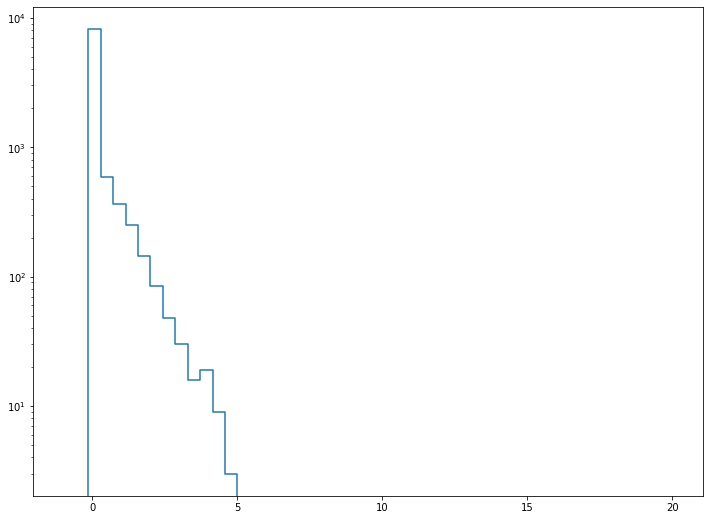

In [174]:
subdf = np.stack(df_evt_list['ClusterWidthSigma'].loc[twocluster_mask].values)

h_width_1 = hl.hist(subdf[:,0],bins=np.linspace(-1.,20.,50.))
hl.plot1d(h_width_1)
plt.yscale('log')

print(np.mean(subdf[:,0]))

# Adding xy resolution into the mix



In [20]:
def ClusterInZAndXY( input_df, z_resolution = 3., xy_resolution = 10., num_lines = -1):

    start_time = time.time()
    thisEvt = 0
    evt_list = []
    evt_dict = GetEmptyEventDict()
    
    zres = z_resolution # mm

    if True:
        thisCluster = 0
        thisClusterMeanX = 0.
        thisClusterMeanY = 0.
        thisClusterMeanZ = 0.
        thisClusterMeanDistFromPrimary = 0.
        thisClusterWidthSigma = 1000.
        thisClusterEnergyDep = 0.
        thisEnergyDepInCluster = 0
        numClusters = 1


    for index,row in input_df.iterrows():
        #if index % 50000 == 0:
            #print('Index: {}, event: {}, thisEvt: {}'.format(index,int(row['eventid']),thisEvt))
        if index > num_lines and num_lines > 0: break
        if row['time'] > 1.: continue
        
        if int(row['eventid']) > thisEvt:
            evt_list.append(evt_dict)
            evt_dict = GetEmptyEventDict()
            thisEvt += 1
            thisCluster = 0
            thisClusterMeanX = 0.
            thisClusterMeanY = 0.
            thisClusterMeanZ = 0.
            thisClusterMeanDistFromPrimary = 0.
            thisClusterWidthSigma = 1000.
            thisClusterEnergyDep = 0.
            thisEnergyDepInCluster = 0
            numClusters = 1
            totalEnergy = 0.
    
        if (row['zp'] - thisClusterMeanZ)**2 > zres**2 or \
            np.sqrt((row['xp'] - thisClusterMeanX)**2 + (row['yp'] - thisClusterMeanY)**2) > xy_resolution:

            # Save cluster information to evt_dict
            evt_dict['ClusterMeanX'][thisCluster] = thisClusterMeanX
            evt_dict['ClusterMeanY'][thisCluster] = thisClusterMeanY
            evt_dict['ClusterMeanZ'][thisCluster] = thisClusterMeanZ
            evt_dict['ClusterMeanDistFromPrimary'][thisCluster] = thisClusterMeanDistFromPrimary
            evt_dict['ClusterWidthSigma'][thisCluster] = thisClusterWidthSigma
            evt_dict['ClusterEnergykeV'][thisCluster] = thisClusterEnergyDep
            evt_dict['NumClusters'] += 1
            evt_dict['TotalEnergy'] += row['ed']
            # Reset cluster variables, start new cluster
            numClusters += 1
            thisCluster +=1
            thisClusterMeanX = row['xp']
            thisClusterMeanY = row['yp']
            thisClusterMeanZ = row['zp']
            thisClusterMeanDistFromPrimary = np.sqrt( row['xp']**2 + row['yp']**2 + row['zp']**2)
            thisClusterWidthSigma = 1000.
            thisClusterEnergyDep = row['ed']
            thisEnergyDepInCluster = 0
        else:
            thisEnergyDepInCluster += 1
            oldClusterMeanX = thisClusterMeanX
            oldClusterMeanY = thisClusterMeanY
            oldClusterMeanZ = thisClusterMeanZ

            thisClusterMeanX = thisClusterMeanX * (thisEnergyDepInCluster-1)/(thisEnergyDepInCluster) + \
                row['xp']/thisEnergyDepInCluster
            thisClusterMeanY = thisClusterMeanY * (thisEnergyDepInCluster-1)/(thisEnergyDepInCluster) + \
                row['yp']/thisEnergyDepInCluster
            thisClusterMeanZ = thisClusterMeanZ * (thisEnergyDepInCluster-1)/(thisEnergyDepInCluster) + \
                row['zp']/thisEnergyDepInCluster
            thisClusterMeanDistFromPrimary = thisClusterMeanDistFromPrimary * (thisEnergyDepInCluster-1)/(thisEnergyDepInCluster) + \
                row['rp_fromPri']/thisEnergyDepInCluster
            thisClusterEnergyDep += row['ed']
            if thisEnergyDepInCluster > 1:
                N = thisEnergyDepInCluster
                thisClusterWidthSigma = np.sqrt( \
                                        1/(N-1) * ( \
                                            (N-2)*thisClusterWidthSigma**2 + \
                                            (\
                                                (row['xp'] - thisClusterMeanX)**2 + \
                                                (row['yp'] - thisClusterMeanY)**2 + \
                                                (row['zp'] - thisClusterMeanZ)**2 ) +\
                                            (N-1)*(\
                                                (oldClusterMeanX-thisClusterMeanX)**2 + \
                                                (oldClusterMeanY-thisClusterMeanY)**2 + \
                                                (oldClusterMeanZ-thisClusterMeanZ)**2) ) )
            else:
                thisClusterWidthSigma = 1000.
            evt_dict['ClusterMeanX'][thisCluster] = thisClusterMeanX
            evt_dict['ClusterMeanY'][thisCluster] = thisClusterMeanY
            evt_dict['ClusterMeanZ'][thisCluster] = thisClusterMeanZ
            evt_dict['ClusterMeanDistFromPrimary'][thisCluster] = thisClusterMeanDistFromPrimary
            evt_dict['ClusterWidthSigma'][thisCluster] = thisClusterWidthSigma
            evt_dict['ClusterEnergykeV'][thisCluster] = thisClusterEnergyDep
            evt_dict['TotalEnergy'] += row['ed']

    print('Returning {} events. Elapsed time: {:3.3}s\n'.format(len(evt_list),time.time()-start_time))
    return pd.DataFrame(evt_list)
        
        
    

In [21]:
z_resolution_values = [1.,2.,3.,4.,5.,7.,10.,15.]
xy_resolution_values = [3., 5., 10.]
list_of_list_of_dfs_rpri = []


for xyres in xy_resolution_values:
    list_of_dfs_rpri = []

    for zres in z_resolution_values:
        print('Z-resolution: {} mm'.format(zres))
        list_of_dfs_rpri.append(ClusterInZAndXY(final_df_rpri,zres,xyres,100))
    list_of_list_of_dfs_rpri.append(list_of_dfs_rpri)

Z-resolution: 1.0 mm


NameError: name 'final_df_rpri' is not defined

In [22]:
len(list_of_list_of_dfs_rpri)

0

In [23]:
eff_values_rpri = np.zeros((len(xy_resolution_values),len(z_resolution_values)))

for j in range(0,len(xy_resolution_values)):  
    list_of_dfs_rpri = list_of_list_of_dfs_rpri[j]
    for i in range(0,len(z_resolution_values)):

        fulldfwidthstack = np.stack(list_of_dfs_rpri[i]['ClusterWidthSigma'].values)
        twocluster_mask = ((list_of_dfs_rpri[i])['NumClusters']==2)#&(fulldfwidthstack[:,0] < 1.)
        fulldfenergystack = np.stack((list_of_dfs_rpri[i])['ClusterEnergykeV'].loc[:].values)
        twocluster_and_gamma_energy_mask = twocluster_mask&(fulldfenergystack[:,1]>131.)&(fulldfenergystack[:,1]<135.)
        eff_values_rpri[j][i] = np.sum(twocluster_and_gamma_energy_mask)/len((list_of_dfs_rpri[i]))
        
    plt.plot(z_resolution_values,eff_values_rpri[j],'-o',label='XY resolution: {} mm'.format(xy_resolution_values[j]))
    
plt.xlabel('Z resolution (mm)')
plt.ylabel('Efficiency of tagging 133 keV gamma')
plt.legend()
            
        
        

IndexError: list index out of range

Text(0.5, 0, 'Number of clusters')

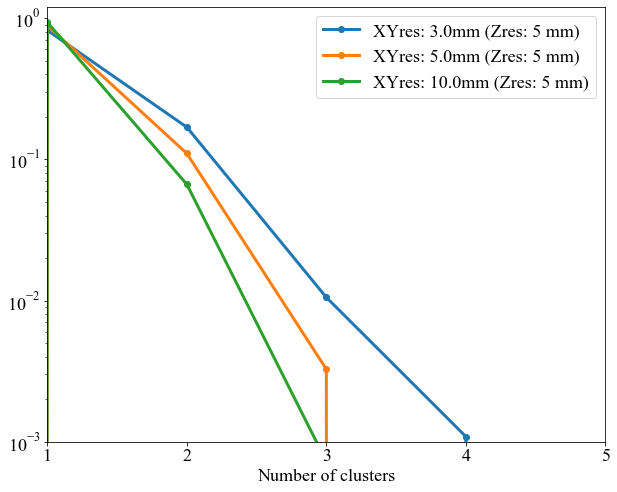

In [283]:

plt.figure(1)
for i in range(0,len(xy_resolution_values)):
    
    h_clusters = hl.hist((list_of_list_of_dfs_rpri[i][4])['NumClusters'],bins=np.linspace(-0.5,14.5,16))
    #hl.plot1d(h_clusters/len(list_of_dfs[i]),label='Zres: {}mm'.format(resolution_values[i]),linewidth=3)
    
    plt.plot( np.linspace(0.,14.,15), (h_clusters/len(list_of_list_of_dfs_rpri[i][4])).values,'-o',label='XYres: {}mm (Zres: 5 mm)'.format(xy_resolution_values[i]),linewidth=3)

    
plt.legend()
plt.xlim(1.,5.)
plt.ylim(0.001,1.2)
plt.xticks([1.,2.,3.,4.,5.],['1','2','3','4','5'])
plt.yscale('log')


plt.xlabel('Number of clusters')


# Now, let's repeat the above analysis to look at scattering into other excited states.

In [24]:
def LoadDataFrameFromXeSimFile( filename ):

    events = uproot.open(filename)['events/events']
    df = events.pandas.df(['ed','zp','xp','yp','rp_fromPri','trackid','parentid','time','eventid'])
    dfsortedbyrpri = df.sort_values('rp_fromPri', ascending=True).sort_index(level='entry', sort_remaining=False) # sort by z
    df3 = dfsortedbyrpri.reset_index(level="entry") # remove multiindex1
    final_df_rpri = df3.reset_index(level="subentry") # remove multiindex2
    
    return final_df_rpri
    

In [25]:
sorted_373df = LoadDataFrameFromXeSimFile('2020-1-2_16-57-40_Be7_neutrino_ccapture_to_373keV_level.root')
sorted_216df = LoadDataFrameFromXeSimFile('2020-1-2_16-54-56_Be7_neutrino_ccapture_to_216keV_level.root')
sorted_133df = LoadDataFrameFromXeSimFile('2019-12-26_17-39-11_Be7_neutrino_ccapture_to_133keV_level.root')



In [26]:
def ComputeEfficienciesForXYAndZ( input_df ):
    z_resolution_values = [1.,2.,3.,4.,5.,7.,10.,15.,25.]
    #xy_resolution_values = [3., 5., 10.,100.,1000.]
    xy_resolution_values = [3., 5., 10.,20.,100.]
    list_of_list_of_dfs_rpri = []


    for xyres in xy_resolution_values:
        list_of_dfs_rpri = []

        for zres in z_resolution_values:
            print('Z-resolution: {} mm'.format(zres))
            list_of_dfs_rpri.append(ClusterInZAndXY(input_df,zres,xyres,500000))
        list_of_list_of_dfs_rpri.append(list_of_dfs_rpri)
        
    return list_of_list_of_dfs_rpri

In [29]:
# start_time = time.time()

# list_of_list_of_dfs_216 = ComputeEfficienciesForXYAndZ(sorted_216df)
# elapsed = time.time() - start_time
# print('Finished 216 keV at {:4.4}s ({:4.4} min)'.format(elapsed,elapsed/60.))
# list_of_list_of_dfs_133 = ComputeEfficienciesForXYAndZ(sorted_133df)
# elapsed = time.time() - start_time
# print('Finished 133 keV at {:4.4}s ({:4.4} min)'.format(elapsed,elapsed/60.))
# list_of_list_of_dfs_373 = ComputeEfficienciesForXYAndZ(sorted_373df)
# elapsed = time.time() - start_time
# print('Finished 373 keV at {:4.4}s ({:4.4} min)'.format(elapsed,elapsed/60.))

# elapsed = time.time() - start_time
# print('Total time elapsed: {:3.3}s ({:3.3} min)'.format(elapsed,elapsed/60.))



Z-resolution: 1.0 mm
Returning 15583 events. Elapsed time: 57.9s

Z-resolution: 2.0 mm
Returning 15583 events. Elapsed time: 57.9s

Z-resolution: 3.0 mm
Returning 15583 events. Elapsed time: 57.4s

Z-resolution: 4.0 mm
Returning 15583 events. Elapsed time: 57.5s

Z-resolution: 5.0 mm
Returning 15583 events. Elapsed time: 57.8s

Z-resolution: 7.0 mm
Returning 15583 events. Elapsed time: 57.4s

Z-resolution: 10.0 mm
Returning 15583 events. Elapsed time: 57.6s

Z-resolution: 15.0 mm
Returning 15583 events. Elapsed time: 57.8s

Z-resolution: 25.0 mm
Returning 15583 events. Elapsed time: 58.4s

Z-resolution: 1.0 mm
Returning 15583 events. Elapsed time: 57.9s

Z-resolution: 2.0 mm
Returning 15583 events. Elapsed time: 57.0s

Z-resolution: 3.0 mm
Returning 15583 events. Elapsed time: 56.1s

Z-resolution: 4.0 mm
Returning 15583 events. Elapsed time: 54.1s

Z-resolution: 5.0 mm
Returning 15583 events. Elapsed time: 54.1s

Z-resolution: 7.0 mm
Returning 15583 events. Elapsed time: 54.4s

Z-resol

Returning 13970 events. Elapsed time: 55.0s

Z-resolution: 10.0 mm
Returning 13970 events. Elapsed time: 55.6s

Z-resolution: 15.0 mm
Returning 13970 events. Elapsed time: 55.2s

Z-resolution: 25.0 mm
Returning 13970 events. Elapsed time: 55.6s

Z-resolution: 1.0 mm
Returning 13970 events. Elapsed time: 54.6s

Z-resolution: 2.0 mm
Returning 13970 events. Elapsed time: 54.8s

Z-resolution: 3.0 mm
Returning 13970 events. Elapsed time: 55.0s

Z-resolution: 4.0 mm
Returning 13970 events. Elapsed time: 55.1s

Z-resolution: 5.0 mm
Returning 13970 events. Elapsed time: 55.3s

Z-resolution: 7.0 mm
Returning 13970 events. Elapsed time: 57.1s

Z-resolution: 10.0 mm
Returning 13970 events. Elapsed time: 57.2s

Z-resolution: 15.0 mm
Returning 13970 events. Elapsed time: 57.0s

Z-resolution: 25.0 mm
Returning 13970 events. Elapsed time: 57.2s

Finished 373 keV at 7.589e+03s (126.5 min)
Total time elapsed: 7.59e+03s (1.26e+02 min)


In [30]:
# import pickle

# with open('list_of_list_of_dfs_133.pkl','wb') as pklfile:
#     pickle.dump(list_of_list_of_dfs_133,pklfile)
    
# with open('list_of_list_of_dfs_216.pkl','wb') as pklfile:
#     pickle.dump(list_of_list_of_dfs_216,pklfile)
    
# with open('list_of_list_of_dfs_373.pkl','wb') as pklfile:
#     pickle.dump(list_of_list_of_dfs_373,pklfile)

In [31]:
import pickle

with open('list_of_list_of_dfs_133.pkl','rb') as pklfile:
    list_of_list_of_dfs_133 = pickle.load(pklfile)
    
with open('list_of_list_of_dfs_216.pkl','rb') as pklfile:
    list_of_list_of_dfs_216 = pickle.load(pklfile)
    
with open('list_of_list_of_dfs_373.pkl','rb') as pklfile:
    list_of_list_of_dfs_373 = pickle.load(pklfile)


In [48]:
z_resolution_values = [1.,2.,3.,4.,5.,7.,10.,15.,25.]
    #xy_resolution_values = [3., 5., 10.,100.,1000.]
xy_resolution_values = [3., 5., 10.,20.,float('inf')]

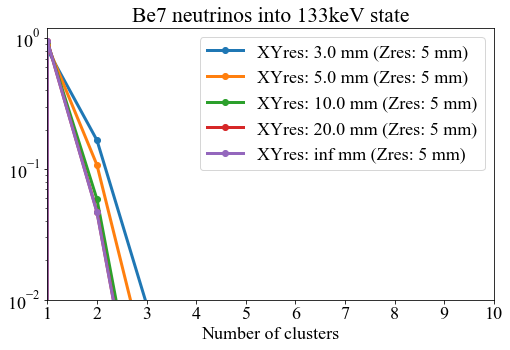

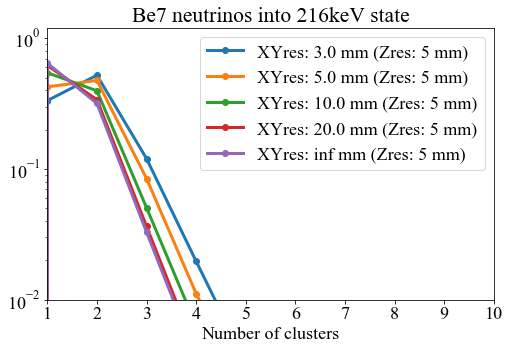

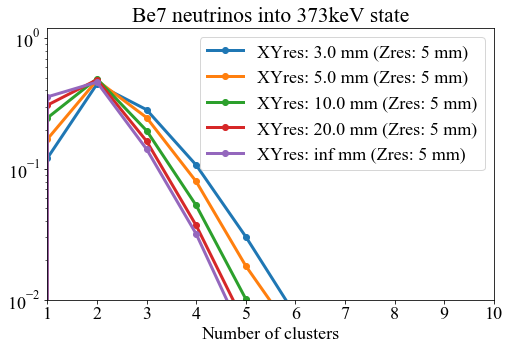

In [49]:
plt.rcParams["figure.figsize"] = (8,5)
plt.figure(1)
for i in range(0,len(xy_resolution_values[:])):
    
    h_clusters = hl.hist((list_of_list_of_dfs_133[i][4])['NumClusters'],bins=np.linspace(-0.5,14.5,16))
    #hl.plot1d(h_clusters/len(list_of_dfs[i]),label='Zres: {}mm'.format(resolution_values[i]),linewidth=3)
    
    plt.plot( np.linspace(0.,14.,15), (h_clusters/len(list_of_list_of_dfs_133[i][4])).values,'-o',label='XYres: {:0.4} mm (Zres: 5 mm)'.format((xy_resolution_values[i])),linewidth=3)

    
plt.legend()
plt.xlim(1.,10.)
plt.ylim(0.01,1.2)
plt.xticks([1.,2.,3.,4.,5.,6.,7.,8.,9.,10.],['1','2','3','4','5','6','7','8','9','10'])
plt.yscale('log')
plt.xlabel('Number of clusters')
plt.title('Be7 neutrinos into 133keV state')


plt.figure(2)
for i in range(0,len(xy_resolution_values[:])):
    
    h_clusters = hl.hist((list_of_list_of_dfs_216[i][4])['NumClusters'],bins=np.linspace(-0.5,14.5,16))
    #hl.plot1d(h_clusters/len(list_of_dfs[i]),label='Zres: {}mm'.format(resolution_values[i]),linewidth=3)
    
    plt.plot( np.linspace(0.,14.,15), (h_clusters/len(list_of_list_of_dfs_216[i][4])).values,'-o',label='XYres: {:0.4} mm (Zres: 5 mm)'.format(xy_resolution_values[i]),linewidth=3)

    
plt.legend()
plt.xlim(1.,10.)
plt.ylim(0.01,1.2)
plt.xticks([1.,2.,3.,4.,5.,6.,7.,8.,9.,10.],['1','2','3','4','5','6','7','8','9','10'])
plt.yscale('log')
plt.xlabel('Number of clusters')
plt.title('Be7 neutrinos into 216keV state')


plt.figure(3)
for i in range(0,len(xy_resolution_values[:])):
    
    h_clusters = hl.hist((list_of_list_of_dfs_373[i][4])['NumClusters'],bins=np.linspace(-0.5,14.5,16))
    #hl.plot1d(h_clusters/len(list_of_dfs[i]),label='Zres: {}mm'.format(resolution_values[i]),linewidth=3)
    
    plt.plot( np.linspace(0.,14.,15), (h_clusters/len(list_of_list_of_dfs_373[i][4])).values,'-o',label='XYres: {:0.4} mm (Zres: 5 mm)'.format(xy_resolution_values[i]),linewidth=3)

    
plt.legend()
plt.xlim(1.,10.)
plt.ylim(0.01,1.2)
plt.xticks([1.,2.,3.,4.,5.,6.,7.,8.,9.,10.],['1','2','3','4','5','6','7','8','9','10'])
plt.yscale('log')
plt.xlabel('Number of clusters')
plt.title('Be7 neutrinos into 373keV state')

plt.rcParams["figure.figsize"] = (10,8)

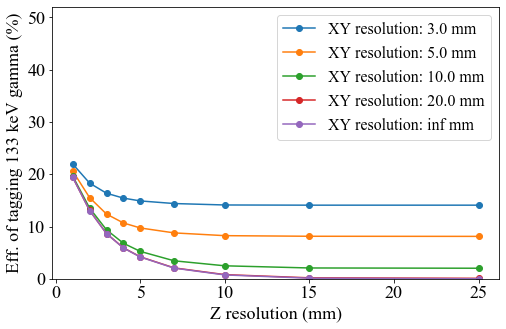

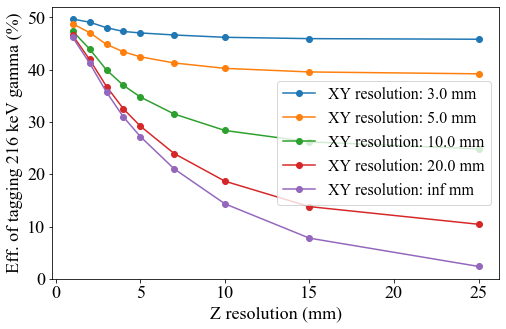

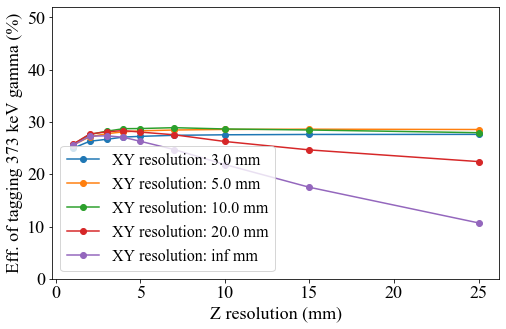

In [50]:
plt.rcParams["figure.figsize"] = (8,5)


plt.figure(1)
eff_values_rpri_133 = np.zeros((len(xy_resolution_values),len(z_resolution_values)))

for j in range(0,len(xy_resolution_values[:])):  
    list_of_dfs_rpri = list_of_list_of_dfs_133[j]
    for i in range(0,len(z_resolution_values)):

        fulldfwidthstack = np.stack(list_of_dfs_rpri[i]['ClusterWidthSigma'].values)
        twocluster_mask = ((list_of_dfs_rpri[i])['NumClusters']==2)#&(fulldfwidthstack[:,0] < 1.)
        fulldfenergystack = np.stack((list_of_dfs_rpri[i])['ClusterEnergykeV'].loc[:].values)
        twocluster_and_gamma_energy_mask = twocluster_mask&(fulldfenergystack[:,1]>131.)&(fulldfenergystack[:,1]<135.)
        eff_values_rpri_133[j][i] = np.sum(twocluster_and_gamma_energy_mask)/len((list_of_dfs_rpri[i]))
        
    plt.plot(z_resolution_values,eff_values_rpri_133[j]*100,'-o',label='XY resolution: {} mm'.format(xy_resolution_values[j]))
    

plt.xlabel('Z resolution (mm)')
plt.ylabel('Eff. of tagging 133 keV gamma (%)')
plt.ylim(0.,52.)
plt.legend(fontsize=16)

plt.figure(2)

eff_values_rpri_216 = np.zeros((len(xy_resolution_values),len(z_resolution_values)))

for j in range(0,len(xy_resolution_values[:])):  
    list_of_dfs_rpri = list_of_list_of_dfs_216[j]
    for i in range(0,len(z_resolution_values)):

        fulldfwidthstack = np.stack(list_of_dfs_rpri[i]['ClusterWidthSigma'].values)
        twocluster_mask = ((list_of_dfs_rpri[i])['NumClusters']==2)#&(fulldfwidthstack[:,0] < 1.)
        fulldfenergystack = np.stack((list_of_dfs_rpri[i])['ClusterEnergykeV'].loc[:].values)
        twocluster_and_gamma_energy_mask = twocluster_mask&(fulldfenergystack[:,1]>215.)&(fulldfenergystack[:,1]<219.)
        eff_values_rpri_216[j][i] = np.sum(twocluster_and_gamma_energy_mask)/len((list_of_dfs_rpri[i]))
        
    plt.plot(z_resolution_values,eff_values_rpri_216[j]*100,'-o',label='XY resolution: {} mm'.format(xy_resolution_values[j]))
    
plt.xlabel('Z resolution (mm)')
plt.ylim(0.,52.)
plt.ylabel('Eff. of tagging 216 keV gamma (%)')
plt.legend(fontsize=16)


plt.figure(3)

eff_values_rpri_373 = np.zeros((len(xy_resolution_values),len(z_resolution_values)))

for j in range(0,len(xy_resolution_values[:])):  
    list_of_dfs_rpri = list_of_list_of_dfs_373[j]
    for i in range(0,len(z_resolution_values)):

        fulldfwidthstack = np.stack(list_of_dfs_rpri[i]['ClusterWidthSigma'].values)
        twocluster_mask = ((list_of_dfs_rpri[i])['NumClusters']==2)#&(fulldfwidthstack[:,0] < 1.)
        fulldfenergystack = np.stack((list_of_dfs_rpri[i])['ClusterEnergykeV'].loc[:].values)
        twocluster_and_gamma_energy_mask = twocluster_mask&(fulldfenergystack[:,1]>370.)&(fulldfenergystack[:,1]<376.)
        eff_values_rpri_373[j][i] = np.sum(twocluster_and_gamma_energy_mask)/len((list_of_dfs_rpri[i]))
        
    plt.plot(z_resolution_values,eff_values_rpri_373[j]*100,'-o',label='XY resolution: {} mm'.format(xy_resolution_values[j]))
    
plt.xlabel('Z resolution (mm)')
plt.ylabel('Eff. of tagging 373 keV gamma (%)')
plt.ylim(0.,52.)
plt.legend(fontsize=16)


plt.rcParams["figure.figsize"] = (10,8)

In [35]:
dftest = list_of_list_of_dfs_133[0][0]
dftest.columns
print(np.random.randn(3))

[-1.86468206 -0.54386823  0.1010352 ]


In [36]:
print(np.random.randn(3))
from copy import deepcopy
idx = 0

def SmearAllClusterEnergiesInList( list_of_list_of_dfs ):
    idx=0
    start_time = time.time()
    new_list_of_list = []
    for list in list_of_list_of_dfs:
        newlist = []
        for df in list:
            dfnew_list = []
            dfnew = pd.DataFrame()
            for index,row in df.iterrows():
                #idx += 1
                #if idx > 2: break
                newrow = row
                newrow['ClusterEnergykeV'] = deepcopy(row['ClusterEnergykeV'])
                mask = newrow['ClusterEnergykeV']>0.
                newrow['ClusterEnergykeV'][mask] = newrow['ClusterEnergykeV'][mask] + np.random.randn(np.sum(mask))*\
                    (power_law(newrow['ClusterEnergykeV'][mask],A=A_pow,B=B_pow) * newrow['ClusterEnergykeV'][mask])
                dfnew_list.append(newrow)
                #print(dfnew_list)
            dfnew = pd.DataFrame(dfnew_list)
            newlist.append(dfnew)
        new_list_of_list.append(newlist)
    print('Time elapsed: {:4.4} s'.format(time.time()-start_time))
    return new_list_of_list


[-0.14848487  0.38169603 -0.30487917]


In [38]:
start_time = time.time()

smeared_list_of_list_of_dfs_133 = SmearAllClusterEnergiesInList( list_of_list_of_dfs_133 )
print('Finished 133 array at {:4.4} s'.format(time.time() - start_time))
smeared_list_of_list_of_dfs_216 = SmearAllClusterEnergiesInList( list_of_list_of_dfs_216 )
print('Finished 216 array at {:4.4} s'.format(time.time() - start_time))
smeared_list_of_list_of_dfs_373 = SmearAllClusterEnergiesInList( list_of_list_of_dfs_373 )
print('Finished 373 array at {:4.4} s'.format(time.time() - start_time))

Time elapsed: 161.1 s
Finished 133 array at 161.1 s
Time elapsed: 177.9 s
Finished 216 array at 339.0 s
Time elapsed: 176.7 s
Finished 373 array at 515.7 s


In [39]:
smeared_list_of_list_of_dfs_216[0][0]['ClusterEnergykeV'].head()

0    [258.91850557342536, 193.8301893860473, 0.0, 0...
1    [306.86573283682316, 166.52525932597496, 0.0, ...
2    [540.0567587212896, 0.0, 0.0, 0.0, 0.0, 0.0, 0...
3    [246.57990922923597, 224.5368472912225, 0.0, 0...
4    [317.9289986424916, 114.34284599569095, 100.91...
Name: ClusterEnergykeV, dtype: object

In [51]:
from itertools import combinations


def CheckPermutationsForMatch(cluster_energy_array,test_energy=373.,num_sigma=2.):

    # NOTE: this function should return the number of clusters needed to get a match.
    # that feature will be used to test whether or not there is a single other energy deposit
    # in the event, or if there are multiple other ones.
    
    Emin = test_energy - num_sigma*(test_energy*power_law(test_energy,A=A_pow,B=B_pow))
    Emax = test_energy + num_sigma*(test_energy*power_law(test_energy,A=A_pow,B=B_pow))
    
    cluster_energies = cluster_energy_array[ cluster_energy_array>0. ]
    
    # exit if there are no clusters with energy greater than 0 keV (shouldn't happen)
    if len(cluster_energies) == 0: return 0
    
    
    # First, look for a single deposit matching the energy
    for E in cluster_energies:
        if E > Emin and E < Emax:
            return 1
    if len(cluster_energies) == 1: return 0
    
    # Next, look for a combination of two deposits matching the energy
    for pair in combinations( cluster_energies, 2):
        E = pair[0] + pair[1]
        if E > Emin and E < Emax:
            return 2
    if len(cluster_energies) == 2: return 0
        
    # Next, look for a combination of three deposits matching the energy
    for triplet in combinations( cluster_energies, 3):
        E = triplet[0] + triplet[1] + triplet[2]
        if E > Emin and E < Emax:
            return 3
    if len(cluster_energies) == 3: return 0
    
    # Next, look for a combination of four deposits matching the energy
    for quadruplet in combinations( cluster_energies, 4):
        E = quadruplet[0] + quadruplet[1] + quadruplet[2] + quadruplet[3]
        if E > Emin and E < Emax:
            return 4
    if len(cluster_energies) == 4: return 0
    
    # Next, look for a combination of five deposits matching the energy
    for quintuplet in combinations( cluster_energies, 5):
        E = quintuplet[0] + quintuplet[1] + quintuplet[2] + quintuplet[3] + quintuplet[4]
        if E > Emin and E < Emax:
            return 5
    if len(cluster_energies) == 5: return 0
        
    return 0




In [41]:
array = np.array([216., 320., 0., 0., 0.])

print(CheckPermutationsForMatch(array,450.,3.))




2


In [42]:
def ComputeEfficienciesUsingPermutations( list_of_list_of_dfs, test_energy = 373., num_sigma = 2.):
    
    list_of_array_of_efficiencies = []
    
    for i in range(len(list_of_list_of_dfs)):
        thislist = list_of_list_of_dfs[i]
        array_of_efficiencies = np.zeros(len(thislist))
        for j in range(len(thislist)):
            thisdf = thislist[j]
            evt_passes_cuts = np.zeros(len(thisdf))
            for index,row in thisdf.iterrows():
                mask = row['ClusterEnergykeV'] > 0.
                num_clusters_in_match = CheckPermutationsForMatch(row['ClusterEnergykeV'],\
                                                                  test_energy=test_energy,\
                                                                  num_sigma=num_sigma)
                if np.sum(mask) - num_clusters_in_match == 1 and num_clusters_in_match > 0:
                    evt_passes_cuts[index] = 1.
                    
            array_of_efficiencies[j] = np.sum(evt_passes_cuts)/len(evt_passes_cuts)
        list_of_array_of_efficiencies.append(array_of_efficiencies)
    
    return list_of_array_of_efficiencies


                

In [43]:
test_df = smeared_list_of_list_of_dfs_133[0][0].iloc[0:6]

test_df2 = smeared_list_of_list_of_dfs_133[3][5].iloc[0:6]

df_list = [test_df,test_df2]

test_list_of_lists = [df_list]

test_list_of_lists[0][0]['ClusterEnergykeV']

0    [525.279602741323, 0.0, 0.0, 0.0, 0.0, 0.0, 0....
1    [442.24617782263516, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2    [453.26669835564996, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3    [347.9819151584226, 151.83669902895383, 0.0, 0...
4    [450.7567012648834, 0.0, 0.0, 0.0, 0.0, 0.0, 0...
5    [379.5691802452998, 150.64699577400629, 0.0, 0...
Name: ClusterEnergykeV, dtype: object

In [44]:
test_list_of_lists[0][1]['ClusterEnergykeV']

0    [547.9616823580004, 0.0, 0.0, 0.0, 0.0, 0.0, 0...
1    [490.64162061452663, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2    [496.64628966091243, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3    [481.8613246942073, 0.0, 0.0, 0.0, 0.0, 0.0, 0...
4    [473.6064246555529, 0.0, 0.0, 0.0, 0.0, 0.0, 0...
5    [411.83183278066036, 119.31802612367466, 0.0, ...
Name: ClusterEnergykeV, dtype: object

In [52]:
start_time = time.time()

combination_efficiencies_133 = ComputeEfficienciesUsingPermutations(smeared_list_of_list_of_dfs_133,test_energy=133.,num_sigma=2.)
print('Finished first one at {:4.4} s'.format(time.time()-start_time))

combination_efficiencies_216 = ComputeEfficienciesUsingPermutations(smeared_list_of_list_of_dfs_216,test_energy=216.,num_sigma=2.)

print('Finished second one at {:4.4} s'.format(time.time()-start_time))

combination_efficiencies_373 = ComputeEfficienciesUsingPermutations(smeared_list_of_list_of_dfs_373,test_energy=373.,num_sigma=2.)

print('Finished third one at {:4.4} s'.format(time.time()-start_time))



Finished first one at 76.2 s
Finished second one at 174.0 s
Finished third one at 261.1 s


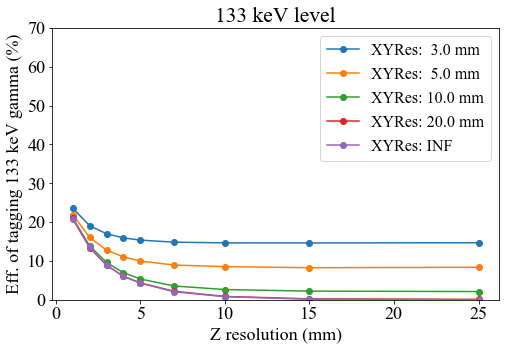

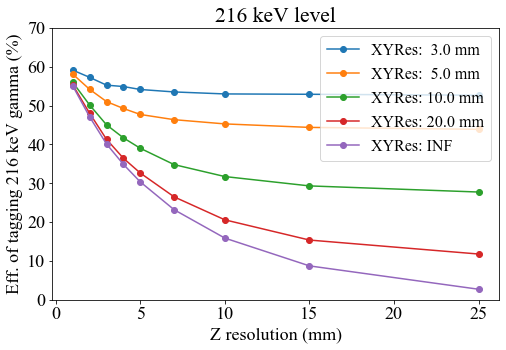

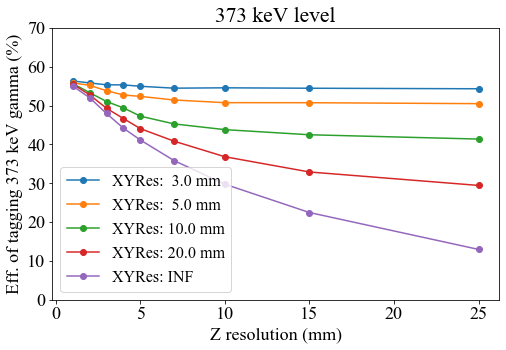

In [54]:
plt.rcParams["figure.figsize"] = (8,5)


plt.figure(1)
for i in range(len(combination_efficiencies_133)):
    if xy_resolution_values[i] > 21.:
        this_label = 'XYRes: INF'
    else:
        this_label = 'XYRes: {:4.4} mm'.format(xy_resolution_values[i])
    plt.plot(z_resolution_values,combination_efficiencies_133[i]*100,'-o',label=this_label)

plt.title('133 keV level')
plt.xlabel('Z resolution (mm)')
plt.ylabel('Eff. of tagging 133 keV gamma (%)')
plt.ylim(0.,70.)
plt.legend(fontsize=16)
    
plt.figure(2)
for i in range(len(combination_efficiencies_216)):
    if xy_resolution_values[i] > 21.:
        this_label = 'XYRes: INF'
    else:
        this_label = 'XYRes: {:4.4} mm'.format(xy_resolution_values[i])
    plt.plot(z_resolution_values,combination_efficiencies_216[i]*100,'-o',label=this_label)

plt.title('216 keV level')
plt.xlabel('Z resolution (mm)')
plt.ylabel('Eff. of tagging 216 keV gamma (%)')
plt.ylim(0.,70.)
plt.legend(fontsize=16)

plt.figure(3)
for i in range(len(combination_efficiencies_373)):
    if xy_resolution_values[i] > 21.:
        this_label = 'XYRes: INF'
    else:
        this_label = 'XYRes: {:4.4} mm'.format(xy_resolution_values[i])
    plt.plot(z_resolution_values,combination_efficiencies_373[i]*100,'-o',label=this_label)

plt.title('373 keV level')
plt.xlabel('Z resolution (mm)')
plt.ylabel('Eff. of tagging 373 keV gamma (%)')
plt.ylim(0.,70.)
plt.legend(fontsize=16)
    
    